# 'Adventure' Playlist - Music Recommendations For Variety And The Long Tail

# Notebook 03 - Preprocessing

&nbsp;

**By: [Jonathan Yeung](https://github.com/jonathan-yeung)**

In this notebook, I intend to make the pre-processed dataframe *df_track_vec* of tracks (as our database of tracks for users) necessary for recommendations, which will involve min-max-scaling `tempo` and count-vectorizing `tags`. There would also be some EDA to assess the qualities of `tags`.

---

# Table of Contents

1. [**Imports**](#Imports)<br>

2. [**Data**](#Data)<br>

3. [**Handling `tags` and EDA**](#Tags)<br>
  3.1 [Number of tags for each track](#n_tags)<br>
  3.2 [Number of occurences for each tag](#occ_tags)<br>
   
4. [**df_track_vec - Pre-processed dataframe for tracks in our database**](#df_track_vec)<br>

5. [**Notebook Summary**](#Notebook-Summary)<br>

---

# Imports

In [1]:
# misc
import os

# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# scaling
from sklearn.preprocessing import MinMaxScaler

# text vectorization
from sklearn.feature_extraction.text import CountVectorizer

# Data

In [2]:
file_path = ''

In [3]:
check_file_track_cleaned = os.path.isfile(file_path + 'data/df_track_cleaned.csv')

print(check_file_track_cleaned)

True


In [4]:
df_track_cleaned = pd.read_csv(file_path + 'data/df_track_cleaned.csv')
df_track_cleaned.head(2).T

,0,1
track_id,TRIOREW128F424EAF0,TRRIVDJ128F429B0E8
name,Mr. Brightside,Wonderwall
artist,The Killers,Oasis
spotify_preview_url,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,https://p.scdn.co/mp3-preview/d012e536916c927b...
spotify_id,09ZQ5TmUG8TSL56n0knqrj,06UfBBDISthj1ZJAtX4xjj
tags,"rock, alternative, indie, alternative_rock, in...","rock, alternative, indie, pop, alternative_roc..."
year,2004,2006
duration_ms,222200,258613
danceability,0.355,0.409
energy,0.918,0.892


---

# Handling `tags` and EDA <a name="Tags"></a>

In [5]:
tags = df_track_cleaned['tags'].copy()

# Converting multiple values in the 'tags' column into dummies columns using CountVectorizer
vec = CountVectorizer()
tags_transformed = vec.fit_transform(tags)

df_tag_vec = pd.DataFrame(columns=vec.get_feature_names_out(), data=tags_transformed.toarray())
df_tag_vec.head()

,00s,60s,70s,80s,90s,acoustic,alternative,alternative_rock,ambient,american,...,ska,soul,soundtrack,swedish,symphonic_metal,synthpop,techno,thrash_metal,trance,trip_hop
0,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Number of tags for each track <a name="n_tags"></a>

In [6]:
# number of tags for each track
df_length = pd.DataFrame({'number_of_tags': df_tag_vec.sum(axis=1).values},
                           index=df_tag_vec.sum(axis=1).index)
df_length.head()

,number_of_tags
0,6
1,9
2,5
3,8
4,8


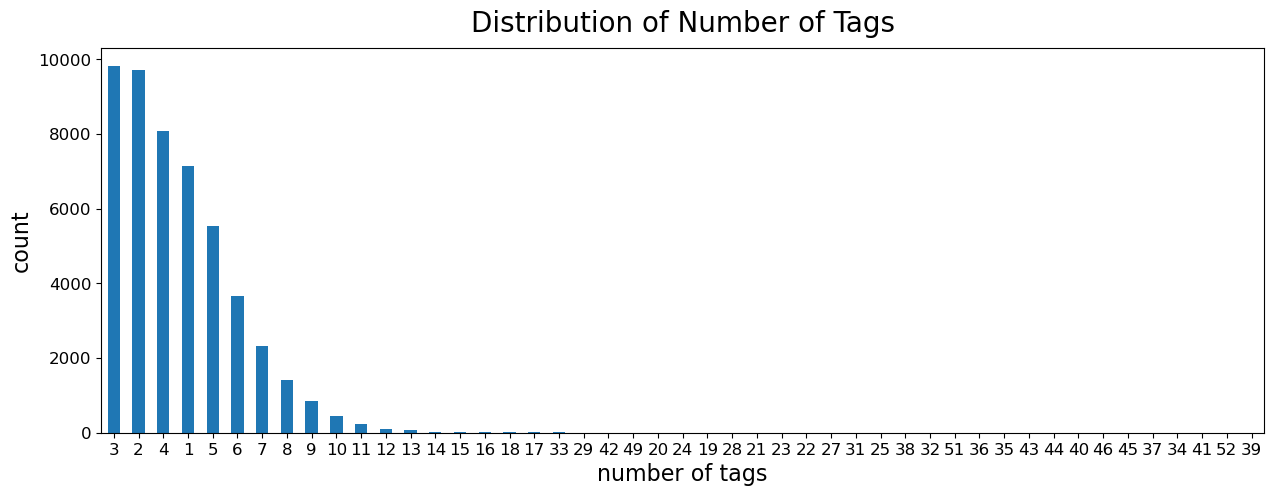

In [7]:
plt.rcParams['figure.figsize'] = [15,5]
plt.figure()
df_length['number_of_tags'].value_counts().plot(kind='bar')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('number of tags', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.title('Distribution of Number of Tags', fontsize=20, y=1.02)
plt.show()

A track could have one or multiple `tags`. This gives some variety to differentiate tracks or find similarity by comparing `tags`.

Although a track could have many `tags` at the same time, the vast majority of the tracks in the dataset have less than 10 `tags`.

## Number of occurences for each tag <a name="occ_tags"></a>

In [8]:
df_tag = pd.DataFrame({'occurences': df_tag_vec.sum(axis=0).values},
                      index=df_tag_vec.sum(axis=0).index)
df_tag.head()

,occurences
00s,1779
60s,1548
70s,1804
80s,2307
90s,2163


In [9]:
print(f"Number of unique tags: {df_tag.shape[0]}")

Number of unique tags: 100


In [12]:
df_tag.sort_values(by='occurences', ascending=False).head(10)

,occurences
rock,10681
indie,7284
electronic,6592
alternative,6271
pop,4649
female_vocalists,4516
alternative_rock,4133
indie_rock,3800
metal,3181
classic_rock,2778


<Figure size 2000x6000 with 0 Axes>

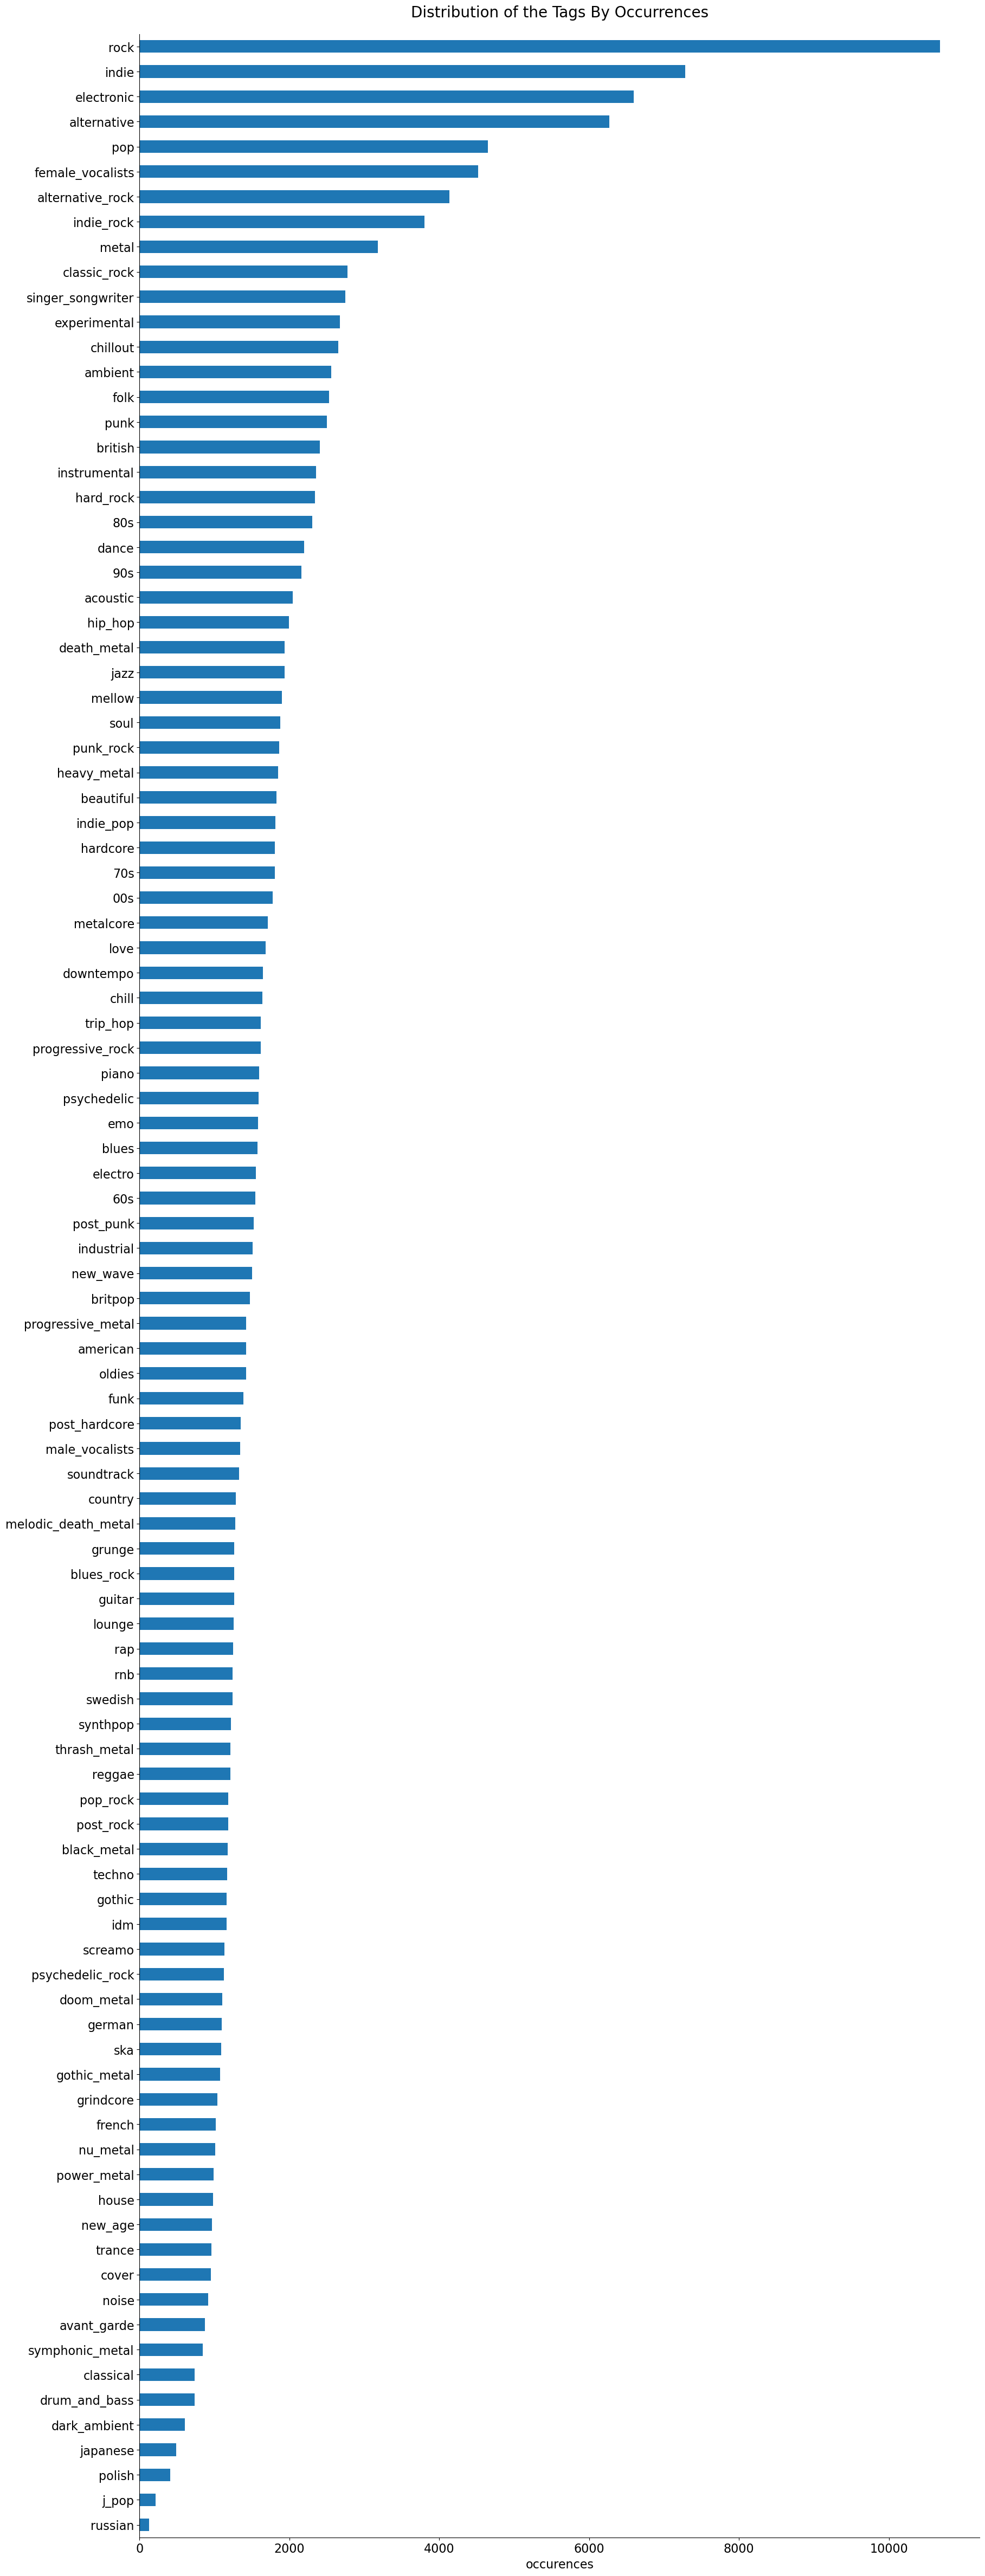

In [13]:
plt.rcParams['figure.figsize'] = [20,60]
plt.figure()
ax = df_tag.sort_values(by='occurences').plot(kind='barh', legend=None)
plt.xlabel('occurences', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Distribution of the Tags By Occurrences', fontsize=20, y=1.005)
ax.spines[['top', 'right']].set_visible(False)
plt.show()

There are 100 unique `tags` for the tracks in the dataset. "rock" is the most common tag among them.

100 `tags` give some choices to label the different qualities of a track, but as "rock" is a very common tag that 10,681 tracks share, it is quite probable that a lot of tracks might have the same similarity score when we compare them. We might need more granularity of `tags` or another new variable to make a more fine comparison between tracks. For now, we will use only these count-vectorized tag columns to compute the similarity between tracks for the prototype.

---

# df_track_vec - Pre-processed dataframe for tracks in our database <a name="df_track_vec"></a>

- `tags` are split into separate columns using Count-Vectorizer.

Each column represents one tag, and each cell has a value of 0 or 1.

- the `tempo` columnn is converted into `tempo_scaled` using MinMaxScaler.

`tempo` has to be scaled down from the range between 0 and 239 to the range between 0 and 1, the same range as other audio features `danceability`, `energy`, `speechiness`, `instrumentalness`, `liveness` and `valence`, as we will put the 7 audio features into the same cosine-distance formula for comparison. Using the same scale ensures the 7 components of the formula have the same impact on the overall score, instead of `tempo` outweighing all other audio features just because of the scale.

MinMaxScaler is chosen here as it preserves the shape of distances between data points, which would be good for further comparison on distances.

In [14]:
# MinMaxScaling on 'tempo'
tempo_scaler = MinMaxScaler()
tempo_scaled = tempo_scaler.fit_transform(df_track_cleaned[['tempo']])

df_track_cleaned['tempo_scaled'] = tempo_scaled

In [14]:
df_track_vec = pd.concat([df_track_cleaned, df_tag_vec], axis=1)
df_track_vec.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,year,duration_ms,danceability,energy,...,ska,soul,soundtrack,swedish,symphonic_metal,synthpop,techno,thrash_metal,trance,trip_hop
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",2004,222200,0.355,0.918,...,0,0,0,0,0,0,0,0,0,0
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",2006,258613,0.409,0.892,...,0,0,0,0,0,0,0,0,0,0
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",1991,218920,0.508,0.826,...,0,0,0,0,0,0,0,0,0,0
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",2004,237026,0.279,0.664,...,0,0,0,0,0,0,0,0,0,0
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",2008,238640,0.515,0.430,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_track_vec.columns[:21]

Index(['track_id', 'name', 'artist', 'spotify_preview_url', 'spotify_id',
       'tags', 'year', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'tempo_scaled'],
      dtype='object')

In [16]:
df_track_vec.columns[21:]

Index(['00s', '60s', '70s', '80s', '90s', 'acoustic', 'alternative',
       'alternative_rock', 'ambient', 'american', 'avant_garde', 'beautiful',
       'black_metal', 'blues', 'blues_rock', 'british', 'britpop', 'chill',
       'chillout', 'classic_rock', 'classical', 'country', 'cover', 'dance',
       'dark_ambient', 'death_metal', 'doom_metal', 'downtempo',
       'drum_and_bass', 'electro', 'electronic', 'emo', 'experimental',
       'female_vocalists', 'folk', 'french', 'funk', 'german', 'gothic',
       'gothic_metal', 'grindcore', 'grunge', 'guitar', 'hard_rock',
       'hardcore', 'heavy_metal', 'hip_hop', 'house', 'idm', 'indie',
       'indie_pop', 'indie_rock', 'industrial', 'instrumental', 'j_pop',
       'japanese', 'jazz', 'lounge', 'love', 'male_vocalists', 'mellow',
       'melodic_death_metal', 'metal', 'metalcore', 'new_age', 'new_wave',
       'noise', 'nu_metal', 'oldies', 'piano', 'polish', 'pop', 'pop_rock',
       'post_hardcore', 'post_punk', 'post_rock', 'pow

In [17]:
df_track_vec.shape

(49548, 121)

In [18]:
df_track_vec.isna().sum().sum()

0

In [19]:
df_track_vec['track_id'].nunique()

49548

The dataframe df_track_vec now contains the count vectorized columns for the `tags` for each track. It has all the columns from the original dataframe df_music, 1 column `tempo_scaled` for MinMaxScaled tempo and additional 100 columns representing the 100 different tags respectively.

The shape of the dataframe is 49,548 by 121.

There is no missing value in the dataframe.

There are 49,548 unique `track_id`s in the dataframe.

In [65]:
# df_track_vec.to_csv(file_path + 'data/df_track_vec.csv', index=False)

In [66]:
# check_file_track_vec = os.path.isfile(file_path + 'data/df_track_vec.csv')

# print(check_file_track_vec)

True


In [67]:
# # uncomment this cell and run df_track_vec from here
# df_track_vec = pd.read_csv(file_path + 'data/df_track_vec.csv')
# df_track_vec.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,year,duration_ms,danceability,energy,...,ska,soul,soundtrack,swedish,symphonic_metal,synthpop,techno,thrash_metal,trance,trip_hop
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",2004,222200,0.355,0.918,...,0,0,0,0,0,0,0,0,0,0
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",2006,258613,0.409,0.892,...,0,0,0,0,0,0,0,0,0,0
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",1991,218920,0.508,0.826,...,0,0,0,0,0,0,0,0,0,0
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",2004,237026,0.279,0.664,...,0,0,0,0,0,0,0,0,0,0
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",2008,238640,0.515,0.430,...,0,0,0,0,0,0,0,0,0,0


---

# Notebook Summary

I have pre-processed the dataframe of tracks for recommendations later on by adding `tempo_scaled` and 100 columns representing 100 tags. It is named as *df_track_vec*.

For the prototype, it acts as the database of tracks for a streaming platform to make recommendations. Ideally, the pre-processing could be carried out every night for recommendations the next day, and would be updated every night.